In [26]:
# imports needed
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# EDA & Data Cleaning

#### Read the file using pandas

In [2]:
booking = pd.read_csv('hotel_booking.csv')

#### Take a look at the head of the data ( the first 3 rows )

In [3]:
booking.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


#### Check the data types and null values

In [4]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Heatmap for all the correlations

<AxesSubplot:>

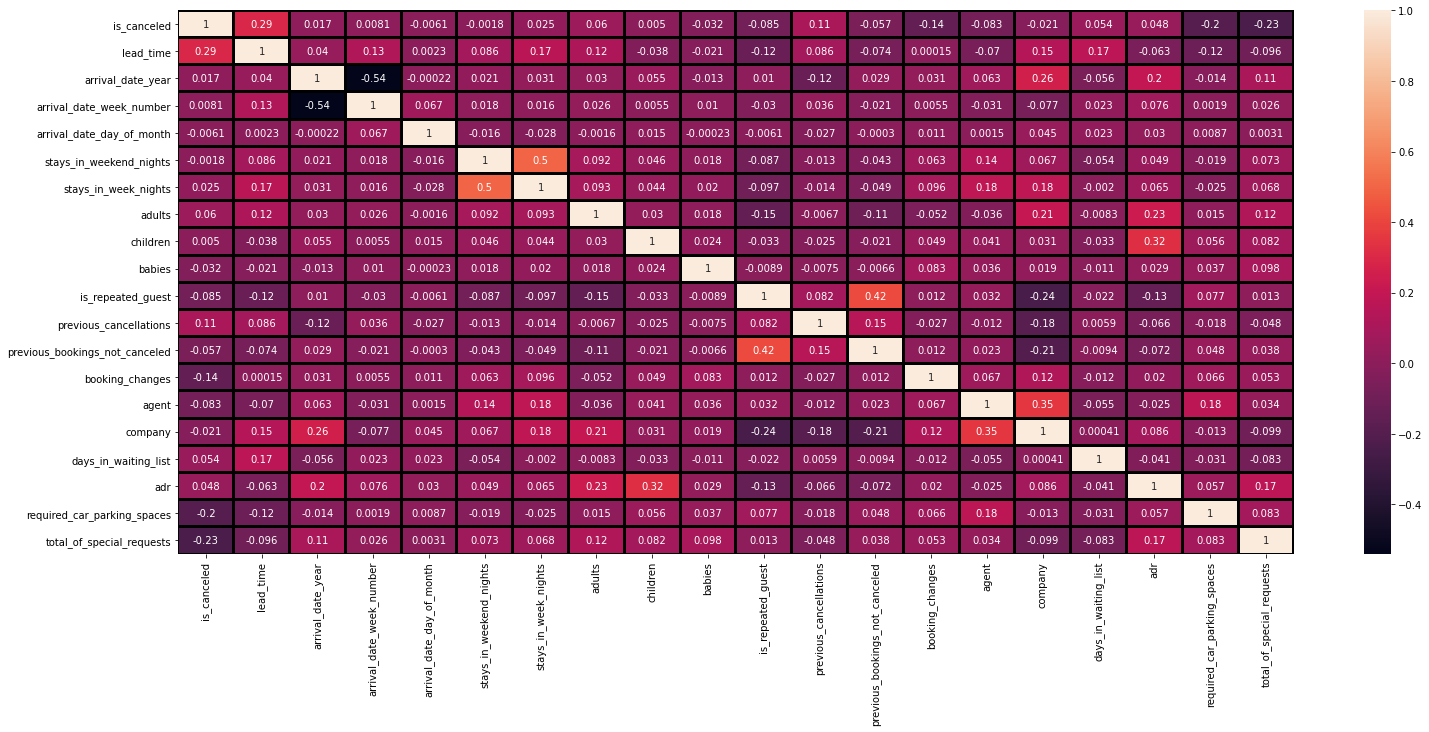

In [5]:
plt.figure(figsize=(25,10))
sns.heatmap(booking.corr(),annot=True,linecolor='black',linewidths=2)

#### Heatmap for null values

<AxesSubplot:>

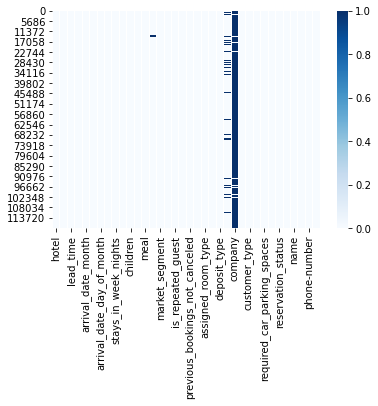

In [6]:
sns.heatmap(booking.isna(),cmap='Blues')

#### Drop and fill null values

In [7]:
booking.drop('company',axis=1,inplace=True)

In [8]:
booking['deposit_type'].fillna(value='No Deposit')

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: object

In [9]:
booking.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


#### Countplot to compare canceled and non canceled reservations

C:\Users\Ashitosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

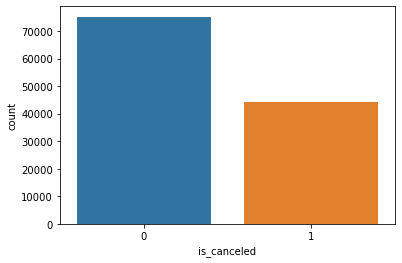

In [10]:
sns.countplot(booking['is_canceled'])

# Train test split & feature selection

In [11]:
from sklearn.model_selection import train_test_split

#### Determining what are the features & label

In [12]:
feature = booking[['lead_time', 'arrival_date_year', 'arrival_date_week_number','stays_in_week_nights', 
                   'previous_cancellations','previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                    'adr', 'required_car_parking_spaces', 'total_of_special_requests',
                  ]]

label =  booking['is_canceled']

In [13]:
X = feature
y = label

#### Train test split with 30% test size

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Data scaling

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)
scaled = scaler.transform(X_test)

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators=140,max_features='auto', max_depth=20)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

C:\Users\Ashitosh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [27]:
print('RFC' + '\n')
print(classification_report(y_test,rfcpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,rfcpred))
accuracy_score(y_test,rfcpred)

RFC

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     22462
           1       0.84      0.69      0.75     13355

    accuracy                           0.83     35817
   macro avg       0.84      0.80      0.81     35817
weighted avg       0.83      0.83      0.83     35817


confusion matrix
[[20695  1767]
 [ 4189  9166]]


0.8337102493229472

# KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

In [39]:
print('KNN' + '\n')
print(accuracy_score(y_test,knnpred))
print('KNN' + '\n')
print(classification_report(y_test,knnpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,knnpred))

KNN

0.76566993327191
KNN

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     22462
           1       0.72      0.60      0.66     13355

    accuracy                           0.77     35817
   macro avg       0.75      0.73      0.74     35817
weighted avg       0.76      0.77      0.76     35817


confusion matrix
[[19345  3117]
 [ 5276  8079]]


# Logistic Regression

#### Do the needed imports for LogisticRegression + metrics

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(solver='liblinear')

#### Fit & predict the values of LogisticRegression

In [32]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [33]:
lrpredict = lr.predict(X_test)

#### Print the classification support & the confusion matrix

0.7349582600441131
classification report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     22462
           1       0.71      0.48      0.58     13355

    accuracy                           0.73     35817
   macro avg       0.73      0.68      0.69     35817
weighted avg       0.73      0.73      0.72     35817


confusion matrix:



<AxesSubplot:>

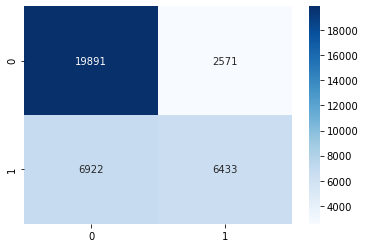

In [38]:
print(accuracy_score(y_test,lrpredict))
print('classification report')
print(classification_report(y_test,lrpredict))
print('\n' + 'confusion matrix:' + '\n')
sns.heatmap(confusion_matrix(y_test,lrpredict),annot=True, fmt='g',cmap='Blues')

# Feature Selection

#### Show which features has the most effect on our results so we can modify and tune our features
#### I used Random Forest Classifier to determine the feature importances

<AxesSubplot:>

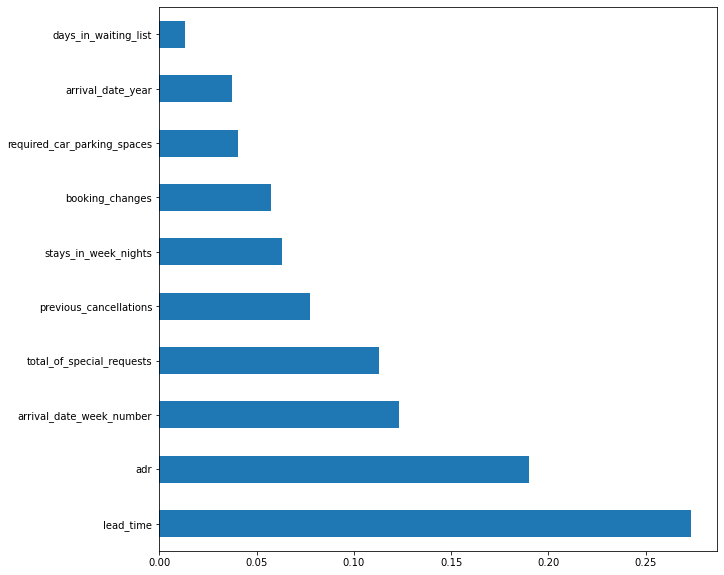

In [40]:
plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=feature.columns)
importance.nlargest(10).plot(kind='barh')

#### Logistic regression had better results, please give your feedback on how can I improve the code above to achieve higher accuracy rates (:

### Thank you !, feel free to add any question or comment.